In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\FSDS 7\EDA_PYTHON\Visadataset.csv")

In [3]:
df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


# **Box plot**

-box plot is used for detect outliers

-box plot has min q1 q2 q3 max value

-Inside box plot red line represents median which 50 percent data

**outlier**

-very very huge observation 

-very very small observation

-which pull the data in any side of the distribution

-Mild outliers

  -q1-1.5*IQR
    
-strong outliers

  -q1-3*IQR   and q3+3*IQR
    
-IQR:inter quartile range
    
    IQR=Q3-Q1
    
-q1:25p

-q2:50p

-q3:75p

 Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

{'whiskers': [<matplotlib.lines.Line2D at 0x22147a5a430>,
 'caps': [<matplotlib.lines.Line2D at 0x22147a5a9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22147a5a160>],
 'medians': [<matplotlib.lines.Line2D at 0x22147a5af70>],
 'fliers': [<matplotlib.lines.Line2D at 0x22147a6f280>],
 'means': []}

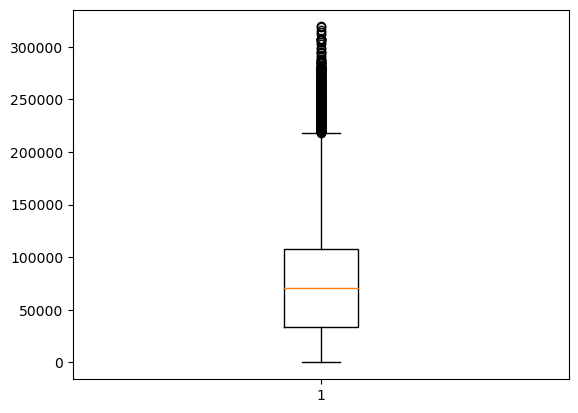

In [4]:
plt.boxplot(df['prevailing_wage'])

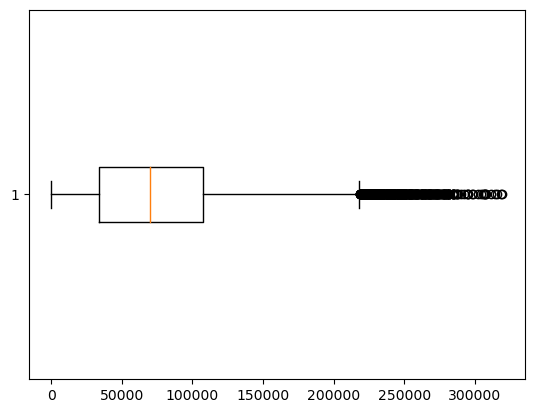

In [5]:
plt.boxplot(df['prevailing_wage'],vert=False)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prevailing_wage'>

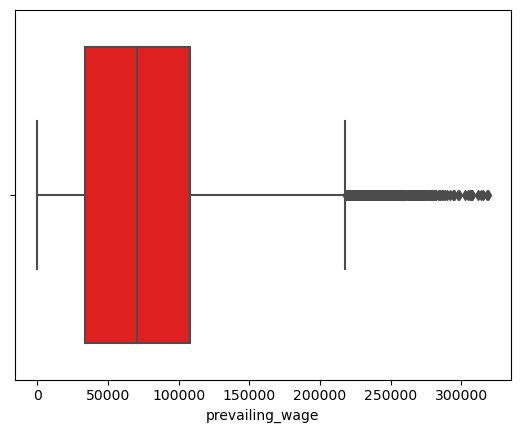

In [6]:
sns.boxplot(df['prevailing_wage'],orient='h', color='red')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prevailing_wage'>

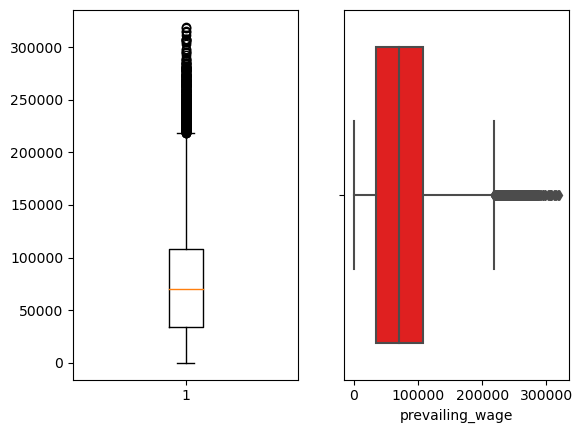

In [7]:
plt.subplot(1,2,1)
plt.boxplot(df['prevailing_wage'])

plt.subplot(1,2,2)
sns.boxplot(df['prevailing_wage'],orient='h', color='red')

{'whiskers': [<matplotlib.lines.Line2D at 0x22147cef3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22147cef970>,
 'boxes': [<matplotlib.lines.Line2D at 0x22147cef100>],
 'medians': [<matplotlib.lines.Line2D at 0x22147ceff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x22147cfd220>],
 'means': []}

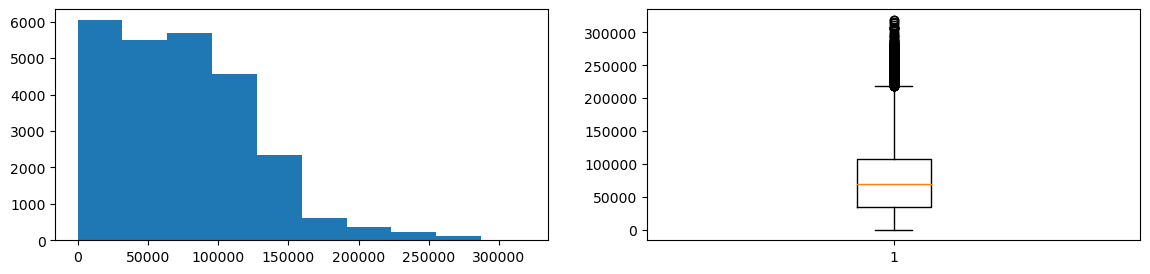

In [8]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df['prevailing_wage'])

# **outlier Analysis**

-outliers are available less than q1-1.5*IQR

-outliers are available greater than q3+1.5*IQR

-Step1:
    
    -Calculate q1
    
    -Calculate q3
    
    -Calculate IQR:q3-q1
        
-Step2:
    
    -LB:q1-1.5*IQR
        
    -UB:q3+1.5*IQR
        
-Step3:
    
    -con1=df['prevailing_wage']<LB
    
    -con2=df['prevailing_wage']>UB
    
    -apply OR operator and get all outlier data


In [9]:
q1=round(np.percentile(df['prevailing_wage'],25),2)
q3=round(np.percentile(df['prevailing_wage'],75),2)

q1,q3


(34015.48, 107735.51)

# **Outlier data**

In [10]:
IQR=q3-q1

LB=q1-1.5*IQR
UB=q3+1.5*IQR

con1=df['prevailing_wage']<LB
con2=df['prevailing_wage']>UB

outliers_data=len(df[con1 | con2])

outliers_data


427

# **Non outlier data**

In [11]:
IQR=q3-q1

LB=q1-1.5*IQR
UB=q3+1.5*IQR

con1=df['prevailing_wage']>LB
con2=df['prevailing_wage']<UB

non_outliers_data=df[con1 & con2]

non_outliers_data


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [12]:
len(non_outliers_data)

25053

# **Histogram and boxplot for non outliers data**

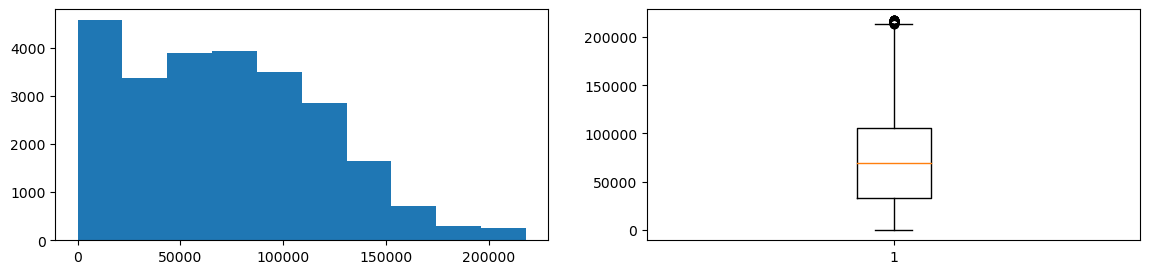

In [13]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

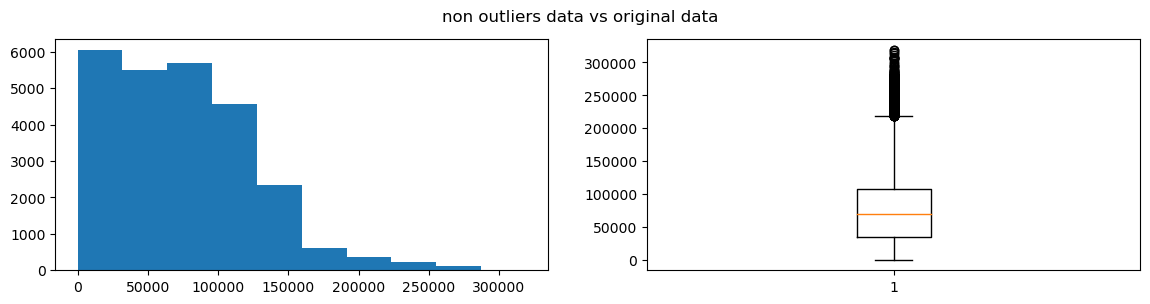

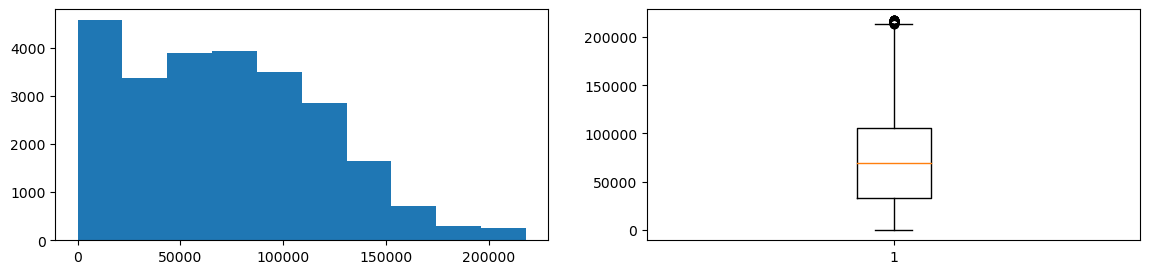

In [14]:
plt.figure(figsize=(14,3))
plt.suptitle('non outliers data vs original data')
plt.subplot(1,2,1).hist(df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df['prevailing_wage'])

plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

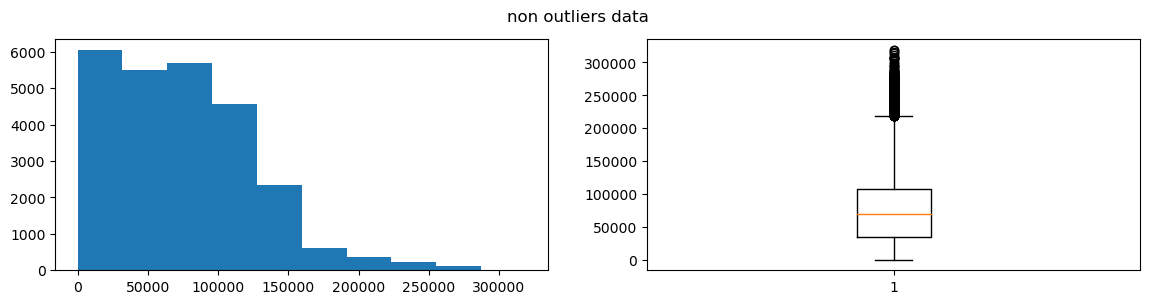

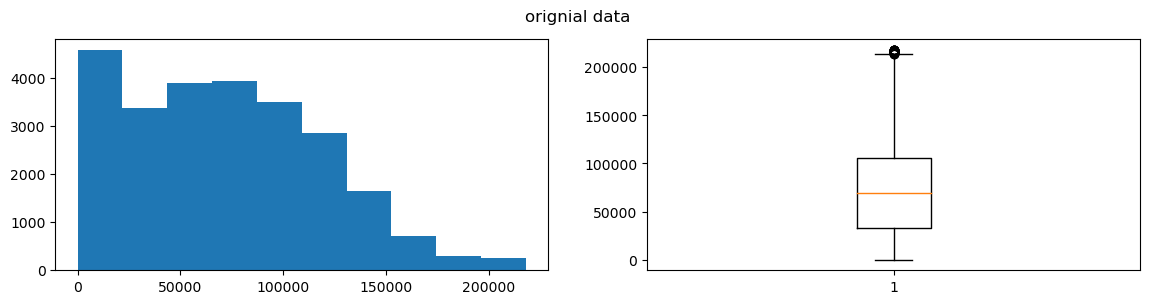

In [15]:
plt.figure(figsize=(14,3))
plt.suptitle('non outliers data ')
plt.subplot(1,2,1).hist(df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df['prevailing_wage'])

plt.figure(figsize=(14,3))
plt.suptitle('orignial data ')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

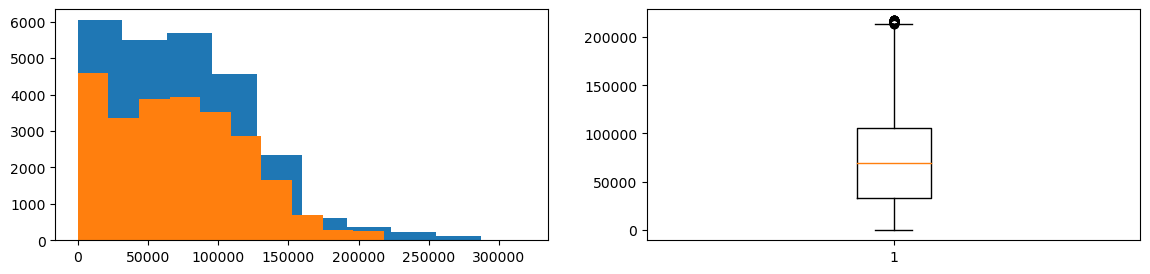

In [16]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

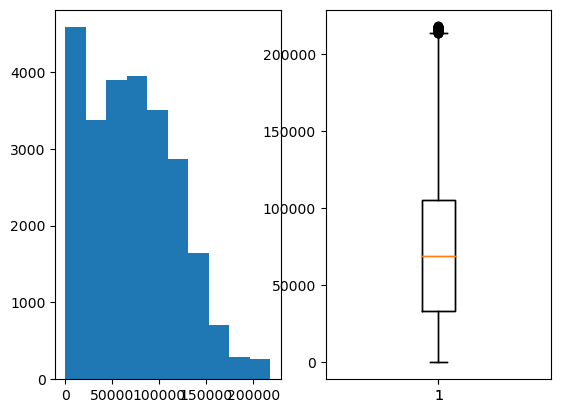

In [17]:
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

# **How to deal the outliers**

**Method 1:-Drop the outliers**
    
    
    -Drop the outliers is not a good idea
    
    -When you drop the outliers,data will loss
    
    -For example,here we are dropping 427 rows
    
    -x% of 25480=427
    
    -it is 1.7% data,here it is fine we can drop the outliers
    
**Method2-Fill with median value**

  -We already know that,outliers doesn't effect the median
    
  -So we can fill outliers by median

**Method3-Cap the values with Q1 and Q3**

 -all lessthan lower bound values we can replace with q1 or LB
    
 -all greater than upper bound values we can replace with q3 or UB
    
    
    
    
    

# **Fill with median**

-create a empty list

-calculate median value

-iterate the df['prevailing_wage'].values

-if each value <lb or >ub then append with median values

else append with i value

In [18]:
q2=round(np.percentile(df['prevailing_wage'],50),2)

q2

70308.21

In [19]:
median=df['prevailing_wage'].median()

median

70308.20999999999

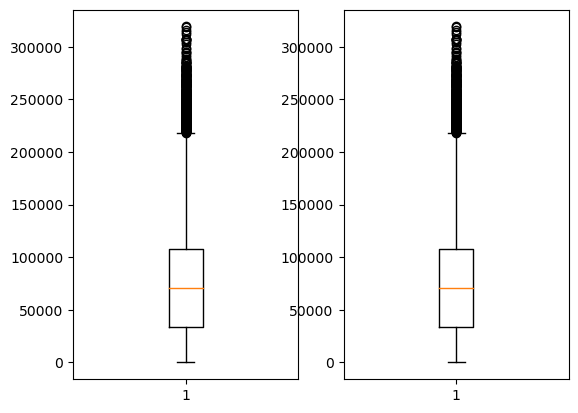

In [20]:
list=[]

median=df['prevailing_wage'].median()

LB=q1-1.5*IQR
UB=q3+1.5*IQR

for value in df['prevailing_wage'].values:
    if value<LB and value>UB:
        list.append(median)
    else:
        list.append(value)
        
df_copy=df.copy()
df_copy['prevailing_wage']=list
plt.subplot(1,2,1).boxplot(df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df['prevailing_wage'])
plt.show()


# **np.where** condition

-We use for binary condition

-It has 3 argumnets

  -condition
  
  -value if condition is True
  
  value if condition is False



In [21]:
data={"subject":["DS","ML","CS"],
   "marks":[100,150,20]}
pd.DataFrame(data)

,subject,marks
0,DS,100
1,ML,150
2,CS,20


In [22]:
#marks column should replace with 1 when value>100
#else same value
#100 100
#150  1
#20   20


con=data['marks']=100
l=np.where(con,1,data['marks'])
l


array(1)

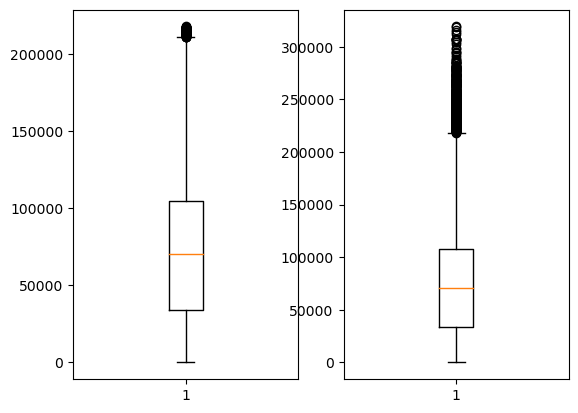

In [23]:
con1=df['prevailing_wage']<LB
con2=df['prevailing_wage']>UB

con=con1 | con2
median=df['prevailing_wage'].median()
new_data=np.where(con,median,df['prevailing_wage'])
df_copy=df.copy()
df_copy['prevailing_wage']=new_data
plt.subplot(1,2,1).boxplot(df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(df['prevailing_wage'])
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x22149815e80>,
 'caps': [<matplotlib.lines.Line2D at 0x22149823460>,
 'boxes': [<matplotlib.lines.Line2D at 0x22149815bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x22149823a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x22149823cd0>],
 'means': []}

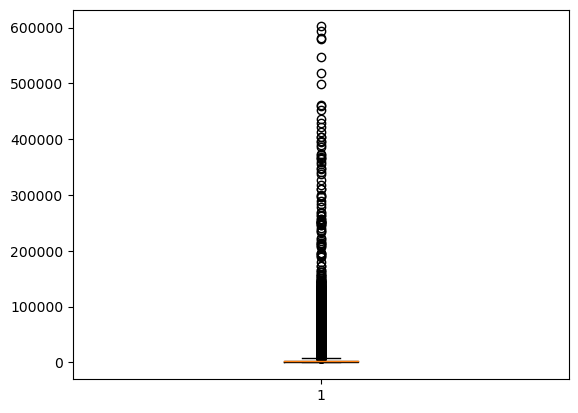

In [24]:
plt.boxplot(df['no_of_employees'])

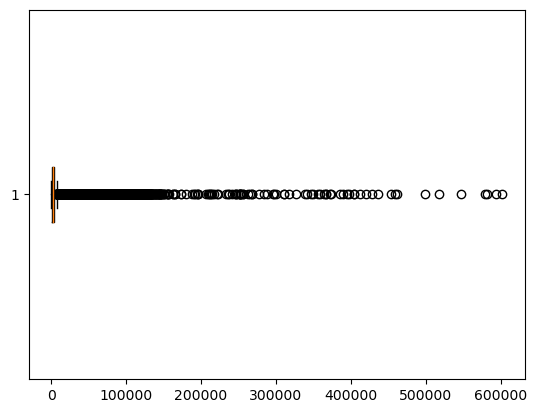

In [25]:
plt.boxplot(df['no_of_employees'],vert=False)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_employees'>

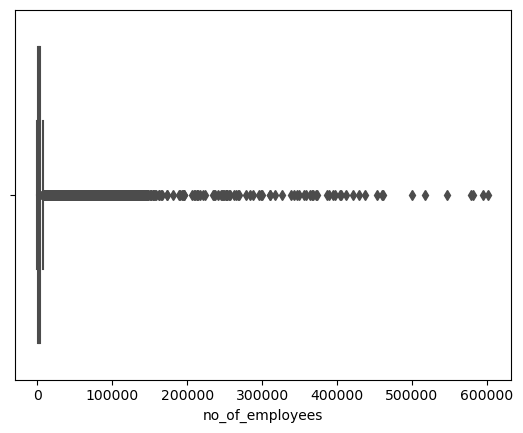

In [26]:
sns.boxplot(df['no_of_employees'],orient="h",color="blue")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_employees'>

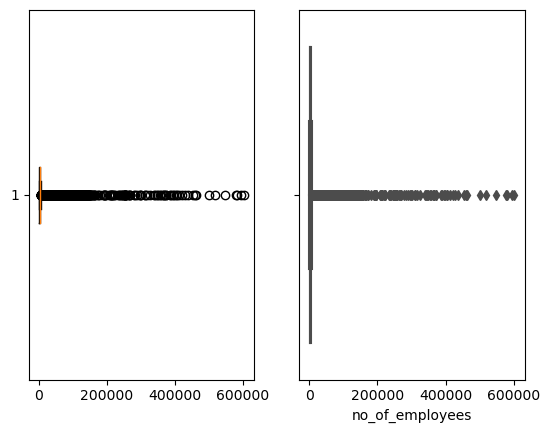

In [27]:
plt.subplot(1,2,1)
plt.boxplot(df['no_of_employees'],vert=False)

plt.subplot(1,2,2)
sns.boxplot(df['no_of_employees'],orient="h",color="blue")

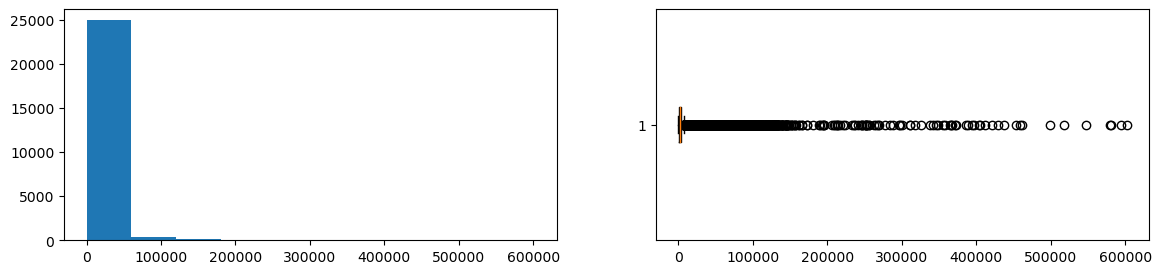

In [28]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(df['no_of_employees'])
plt.subplot(1,2,2).boxplot(df['no_of_employees'],vert=False)
plt.show()


In [29]:
q1=round(np.percentile(df['no_of_employees'],25),2)
q3=round(np.percentile(df['no_of_employees'],75),2)

IQR=q3-q1

LB=q1-1.5*IQR
UB=q3+1.5*IQR

con1=df['no_of_employees']<LB
con2=df['no_of_employees']>UB

outlier_data=df[con1 | con2]

outlier_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.7300,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25441,EZYV25442,Asia,Master's,N,N,28199,1988,Northeast,97906.7600,Year,Y,Certified
25443,EZYV25444,Africa,Bachelor's,N,N,72892,2007,Northeast,215.1000,Hour,Y,Certified
25455,EZYV25456,South America,Bachelor's,N,N,24335,1993,Midwest,97393.4900,Year,Y,Certified
25464,EZYV25465,Asia,Master's,N,N,48785,1974,South,145102.3600,Year,N,Certified


In [30]:
len(outlier_data)

1556

In [31]:
q1=round(np.percentile(df['no_of_employees'],25),2)
q3=round(np.percentile(df['no_of_employees'],75),2)

IQR=q3-q1

LB=q1-1.5*IQR
UB=q3+1.5*IQR

con1=df['no_of_employees']>LB
con2=df['no_of_employees']<UB

non_outlier_data=df[con1 & con2]

non_outlier_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [32]:
len(non_outlier_data)

23924

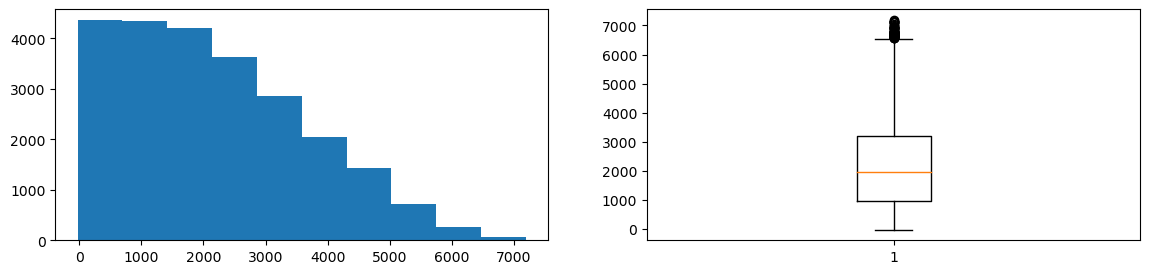

In [33]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(non_outlier_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outlier_data['no_of_employees'])
plt.show()



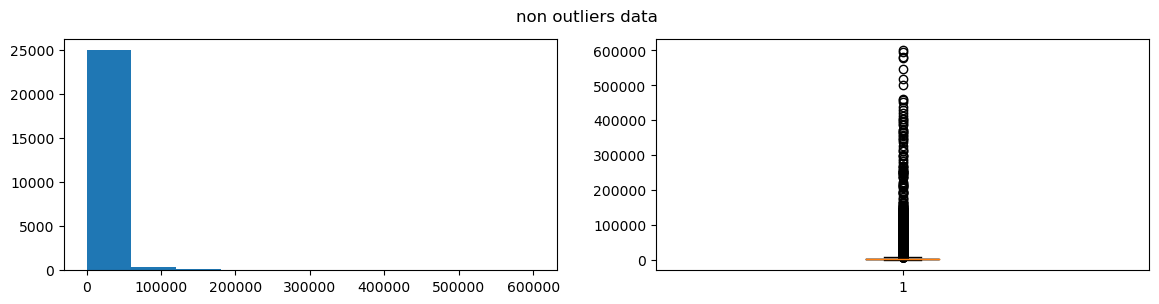

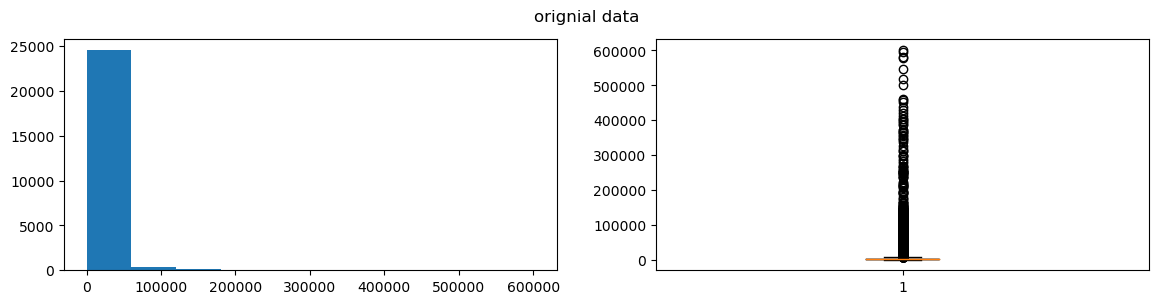

In [34]:
plt.figure(figsize=(14,3))
plt.suptitle('non outliers data ')
plt.subplot(1,2,1).hist(df['no_of_employees'])
plt.subplot(1,2,2).boxplot(df['no_of_employees'])

plt.figure(figsize=(14,3))
plt.suptitle('orignial data ')
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees'])
plt.show()

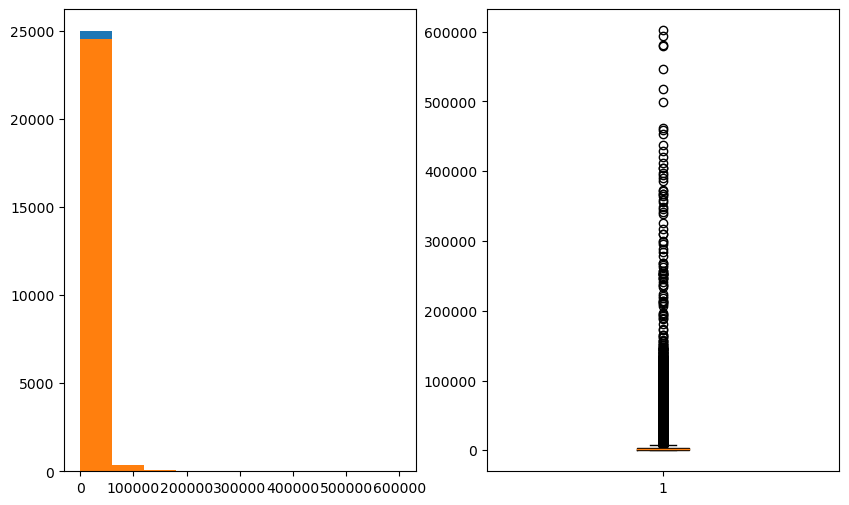

In [35]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).hist(df['no_of_employees'])
plt.subplot(1,2,1).hist(non_outliers_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees'])
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x221493d3610>,
 'caps': [<matplotlib.lines.Line2D at 0x2214998a1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221493d3100>],
 'medians': [<matplotlib.lines.Line2D at 0x2214998a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x2214998aa30>],
 'means': []}

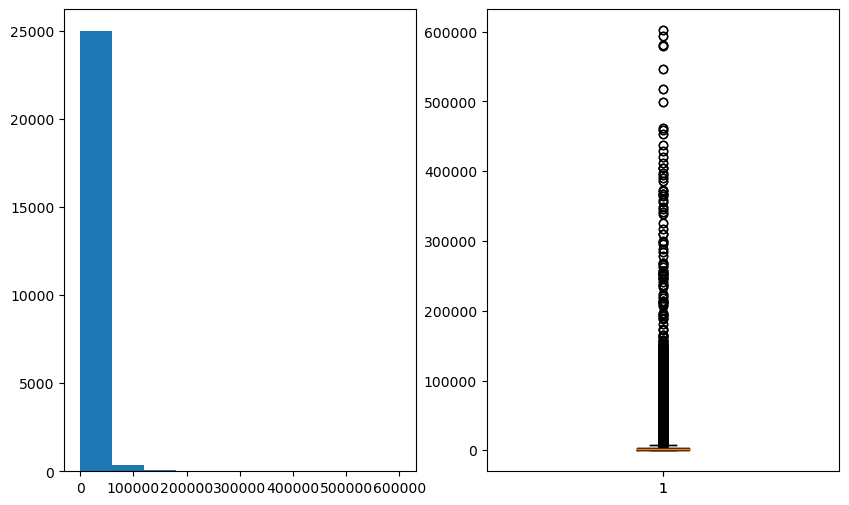

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).hist(df['no_of_employees'])
plt.subplot(1,2,2).boxplot(df['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outliers_data['no_of_employees'])

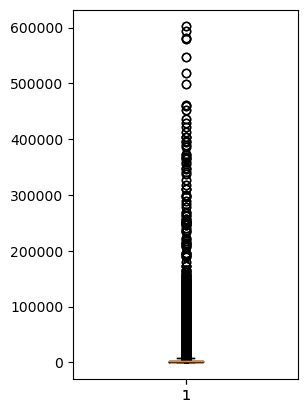

In [37]:
list=[]

median=df['no_of_employees'].median()

q1=round(np.percentile(df['no_of_employees'],25),2)
q3=round(np.percentile(df['no_of_employees'],75),2)

LB=q1-1.5*IQR
UB=q3+1.5*IQR

IQR=q3-q1

for value in df['no_of_employees'].values:
    if value<LB and value>UB:
        list.append(median)
        
    else:
        list.append(value)
        
        
df_copy=df.copy()
df_copy['no_of_employees']=list
plt.subplot(1,2,1).boxplot(df_copy['no_of_employees'])
plt.subplot(1,2,1).boxplot(df_copy['no_of_employees'])
plt.show()


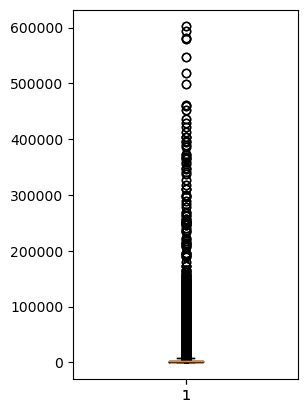

In [38]:
con1=df['no_of_employees']<LB
con2=df['no_of_employees']>UB

con=con1 | con2
median=df['no_of_employees'].median()
new_data=np.where(con,median,df['no_of_employees'])
df_copy=df.copy()
df_copy['no_of_employees']=list
plt.subplot(1,2,1).boxplot(df_copy['no_of_employees'])
plt.subplot(1,2,1).boxplot(df_copy['no_of_employees'])
plt.show()

